# Step 2: Optimization algorithm

In [8]:
%load_ext autoreload
%autoreload 2
from Algorithms.Greedy_algorithm import *
import matplotlib.pyplot as plt
from Environment.E_commerce import *
from Environment.Product import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
P1 = Product(0,[19.99, 21.99, 23.99, 26.99],np.multiply([0.4, 0.4, 0.4, 0.4],[19.99, 21.99, 23.99, 26.99]))
# t-shirt
P2 = Product(1,[29.99, 32.59, 35.99, 39.99],np.multiply([0.4, 0.4, 0.4, 0.4],[29.99, 32.59, 35.99, 39.99]))
# shirt
P3 = Product(2,[25.99,28.99, 31.99, 34.99],np.multiply([0.4, 0.4, 0.4, 0.4],[25.99,28.99, 31.99, 34.99]))
# shorts
P4 = Product(3,[38.99,43.99,46.99, 49.99],np.multiply([0.4, 0.4, 0.4, 0.4],[38.99,43.99,46.99, 49.99]))
# pants
P5 = Product(4,[79.99,89.99, 99.99, 109.99],np.multiply([0.4, 0.4, 0.4, 0.4],[79.99,89.99, 99.99, 109.99]))
# shoes

products = [P1,P2,P3,P4,P5]
        
E = E_commerce()
E.graph = np.array([[0. , 0., 1. , 0.5 , 0. ],[0. , 0. , 0.5 , 1., 0. ],[0.5 , 1. , 0. , 0. , 0. ],[1. , 0.5 , 0. , 0. , 0. ],[0. , 0.5 , 0. , 1. , 0. ]])
E.set_products(products)
E.set_lambda(0.5)

In [11]:
#matrix with the difference between prices and costs
#m_ij margins on the price j for the product i
margins_matrix = np.zeros((5,4))
for i in range(5):
    for j in range(4):
        margins_matrix[i,j] = products[i].margins_list[j]

margins = margins_matrix
#Conversion rate matrix
#in this step all conversion rates are known
#p_ij conversion rate of price j for the product i
#with higher price (j+1>j) -> lower conversion rate
p1 = np.array([0.38, 0.16, 0.15, 0.1])
p2 = np.array([0.42, 0.41, 0.18, 0.12])
p3 = np.array([0.32, 0.28, 0.17, 0.13])
p4 = np.array([0.36, 0.33, 0.25, 0.18])
p5 = np.array([0.30, 0.29, 0.22, 0.15])
C = np.array([p1,p2,p3,p4,p5])
#They are supposed to be known, but we can take their estimations from step 3
C = np.array(
    [[0.69334299, 0.15864193, 0.06566728, 0.01168772],
     [0.93377632, 0.59672407, 0.50127129, 0.22567331],
     [0.99395335, 0.95952215, 0.691365,   0.59561344],
     [0.69047299, 0.22901752, 0.15824826, 0.00297488],
     [0.97734534, 0.89545417, 0.68816697, 0.40171434]])

# rewards per price
#Conversion rate matrix
#in this step all conversion rates are known
#p_ij conversion rate of price j for the product i
#with higer price (j+1>j) -> lower conversion rate
R = C*margins
R

array([[ 5.54397055,  1.39541442,  0.63014322,  0.12618063],
       [11.20158073,  7.77889498,  7.21630149,  3.60987027],
       [10.33313903, 11.12661885,  8.84670654,  8.33620571],
       [10.76861675,  4.02979228,  2.97443429,  0.0594857 ],
       [31.2711415 , 32.2327683 , 27.52392613, 17.6738241 ]])

In [12]:
# computation of the optimal configuration
opt = 0
for i in range(5):
    opt += np.max(R[i,:])

best_arm_per_product = np.zeros(5)
for i in range(5):   
    best_arm_per_product[i] = np.argmax(np.array(E.products[i].margins_list) * C[i,:])

print("Optimal expected reward:", opt)
print("Best configuration: ", best_arm_per_product) #best arm for product i

Optimal expected reward: 70.87355518952
Best configuration:  [0. 0. 1. 0. 1.]


In [13]:
lista = Greedy_algorithm(np.array(C), np.array(margins)) 
max_found = lista[0]
products_to_increase = lista[1]
rewards_per_configuration = lista[2]
max_reward_history = lista[3]
num_it = lista[4]

starting configuration:  69.11844856004001
Iterazione  1
70.08007536472
Iterazione  2
70.87355518952
Iterazione  3
__________________
max expected reward found:  70.87355518952
__________________
best configuration: 
1 ): 
increase price of the product 5
2 ): 
increase price of the product 3


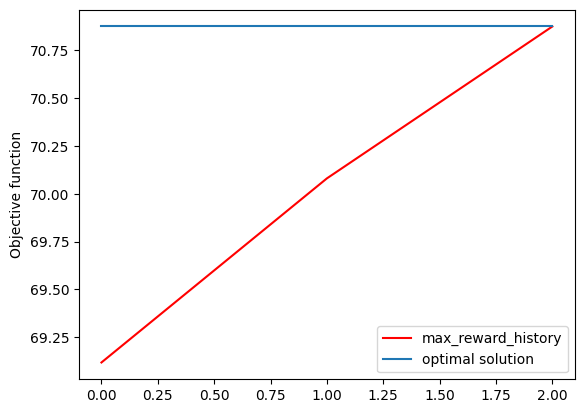

In [14]:
 #maximization of the cumulative expected margin over all the products
plt.ylabel("Objective function")
plt.plot(range(len(max_reward_history)),max_reward_history, 'r')
plt.plot(range(len(max_reward_history)),np.ones(len(max_reward_history))*opt)
plt.legend(["max_reward_history", "optimal solution"])
#in this case the greedy algorithm reached the optimal solution but it's npt always true

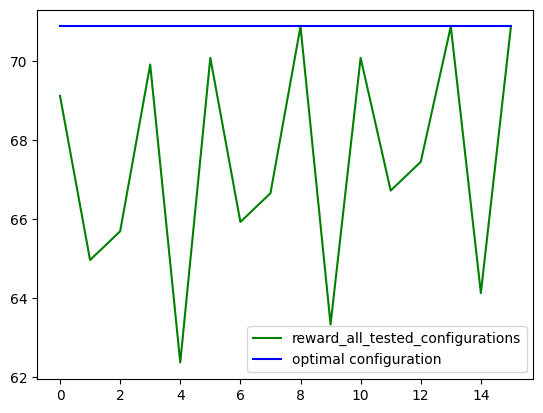

In [15]:
plt.plot(rewards_per_configuration, 'g')
plt.plot(np.ones(len(rewards_per_configuration))*opt, 'b')
plt.legend(["reward_all_tested_configurations","optimal configuration"])

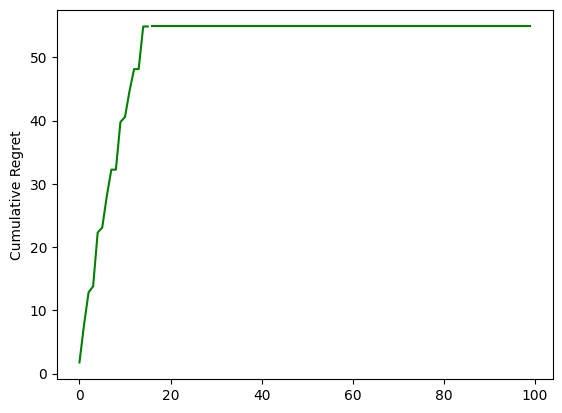

In [16]:
# If we test in each day a new configuration we get this regret (over a period of X days) and we never reach the optimal solution
plt.ylabel("Cumulative Regret")
plt.plot(np.cumsum(opt - rewards_per_configuration, axis=0), 'g')
#regret over 100 days
rewards_greedy = np.ones(100-len(rewards_per_configuration))*np.max(rewards_per_configuration)
plt.plot(range(len(rewards_per_configuration),100),np.sum(opt - rewards_per_configuration, axis=0)+np.cumsum(opt - rewards_greedy, axis=0), 'g')